导包

In [1]:
import torch
import torch.nn.functional as F

数据集准备

In [2]:
x_data=torch.Tensor([[1.0], [2.0], [3.0]])
y_data=torch.Tensor([[0], [0], [1]])

重写模型方法

In [3]:
class LogisticRegressionModel(torch.nn.Module):
    def __init__(self):
        super(LogisticRegressionModel, self).__init__()
        self.linear = torch.nn.Linear(1, 1)
        
    def forward(self, x):
        y_pred = F.sigmoid(self.linear(x))
        return y_pred

创建模型

In [4]:
model = LogisticRegressionModel()

声明损失函数和优化器

In [5]:
criterion = torch.nn.BCELoss(size_average=False)
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

e:\Anaconda\envs\py38\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


开始训练

In [6]:
for epoch in range(1000):
    y_pred = model(x_data)
    loss = criterion(y_pred, y_data)
    print(epoch, loss.item())
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

0 2.8019893169403076
1 2.7575652599334717
2 2.7154576778411865
3 2.6756036281585693
4 2.6379363536834717
5 2.602382183074951
6 2.568864345550537
7 2.537303924560547
8 2.507617712020874
9 2.479721784591675
10 2.4535317420959473
11 2.428961753845215
12 2.405927896499634
13 2.3843462467193604
14 2.3641345500946045
15 2.3452131748199463
16 2.3275039196014404
17 2.310932159423828
18 2.2954249382019043
19 2.2809133529663086
20 2.2673308849334717
21 2.25461483001709
22 2.2427053451538086
23 2.23154616355896
24 2.221083641052246
25 2.2112679481506348
26 2.202052116394043
27 2.193392038345337
28 2.185246229171753
29 2.1775760650634766
30 2.17034649848938
31 2.1635231971740723
32 2.157075881958008
33 2.150974988937378
34 2.1451945304870605
35 2.139708995819092
36 2.1344962120056152
37 2.1295344829559326
38 2.1248044967651367
39 2.1202878952026367
40 2.1159679889678955
41 2.1118292808532715
42 2.1078577041625977
43 2.1040403842926025
44 2.1003646850585938
45 2.0968198776245117
46 2.09339570999145

导入画图工具

In [7]:
import numpy as np
import matplotlib.pyplot as plt

声明

In [8]:
x = np.linspace(0, 10, 200)
x_t = torch.Tensor(x).view((200, 1))

预测

In [9]:
y_t = model(x_t)
y = y_t.data.numpy()

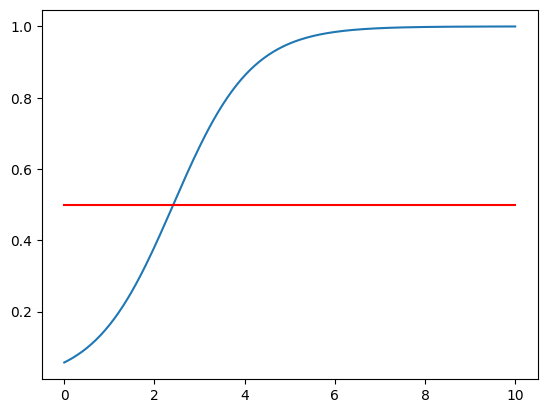

In [10]:
plt.plot(x, y)
plt.plot([0, 10], [0.5, 0.5], c='r')
